In [22]:
# import dependencies

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

wellness_data_to_load = Path("data/Wellbeing_and_lifestyle_data_Kaggle.csv")

wellness_data_df = pd.read_csv(wellness_data_to_load)
wellness_data_df.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


In [28]:
# Build DataFrame with values related to social network
fruits_and_vegetables = wellness_data_df["FRUITS_VEGGIES"]
daily_steps = wellness_data_df["DAILY_STEPS"]
BMI = wellness_data_df["BMI_RANGE"]
sleep_hours = wellness_data_df["SLEEP_HOURS"]
work_life_score = wellness_data_df["WORK_LIFE_BALANCE_SCORE"]
stress = wellness_data_df["DAILY_STRESS"]
age_range = wellness_data_df["AGE"]
gender = wellness_data_df["GENDER"]

# Create a DataFrame 
networking_df = pd.DataFrame({
    "Age": age_range,
    "Gender": gender,
    "Stress": stress,
    "FRUITS_VEGGIES": fruits_and_vegetables,
    "DAILY_STEPS": daily_steps,
    "BMI_RANGE": BMI,
    "SLEEP_HOURS": sleep_hours,
    "WORK_LIFE_BALANCE_SCORE": work_life_score
})

# Convert Stress column to integer
stress_values = ["0", "1", "2", "3", "4", "5"]
networking_df = networking_df[networking_df["Stress"].isin(stress_values)]
networking_df["Stress"] = networking_df["Stress"].astype(int)

# Create bins to categorize work life balance scores 
bins =[0, 550, 680, 900]
group_names = ['Poor', 'Good', 'Excellent']
networking_df['Work Life Summary'] = pd.cut(networking_df['WORK_LIFE_BALANCE_SCORE'], bins, labels=group_names, include_lowest=True)
bin_counts = networking_df['Work Life Summary'].value_counts()

# Separate data by gender
networking_male_df = networking_df[networking_df["Gender"] == "Male"]
networking_female_df = networking_df[networking_df["Gender"] == "Female"]

# comparing by age
networking_df = networking_df.replace("Less than 20", "20 or Younger")
networking_df = networking_df.replace("51 or more", "51 or Older")



# Display the first few rows of the DataFrame
networking_df.head()

,Age,Gender,Stress,FRUITS_VEGGIES,DAILY_STEPS,BMI_RANGE,SLEEP_HOURS,WORK_LIFE_BALANCE_SCORE,Work Life Summary
0,36 to 50,Female,2,3,5,1,7,609.5,Good
1,36 to 50,Female,3,2,5,2,8,655.6,Good
2,36 to 50,Female,3,2,4,2,8,631.6,Good
3,51 or Older,Female,3,3,5,2,5,622.7,Good
4,51 or Older,Female,1,5,5,2,7,663.9,Good


In [29]:
# How does a healthy diet or healthy activity affect mental health and well-being? Daniel
# Fruits and Vegetables, Daily Steps, BMI Range, Sleep Hours

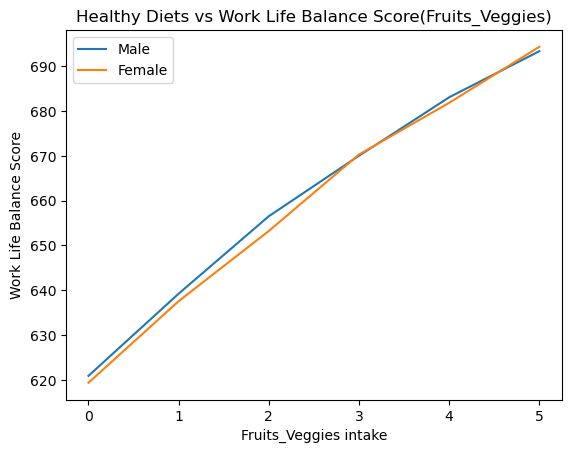

In [37]:
# Sort the weekly meditation by gender and create 2 new dataframes
male_FRUITS_VEGGIES = networking_male_df.groupby('FRUITS_VEGGIES')['WORK_LIFE_BALANCE_SCORE'].mean()
female_FRUITS_VEGGIES = networking_female_df.groupby('FRUITS_VEGGIES')['WORK_LIFE_BALANCE_SCORE'].mean()

# Plot the line curves for males and females with labels
male_FRUITS_VEGGIES.plot(label='Male')
female_FRUITS_VEGGIES.plot(label='Female')

# Set x and y-axis labels and the plot title
plt.xlabel('Fruits_Veggies intake')
plt.ylabel('Work Life Balance Score')
plt.title('Healthy Diets vs Work Life Balance Score(Fruits_Veggies)')

# Add a legend to distinguish between the data for males and females
plt.legend()

# Save the figure
plt.savefig("data/Healthy Diets vs Work Life Balance Score(Fruits_Veggies).png")

# Show the plot
plt.show()


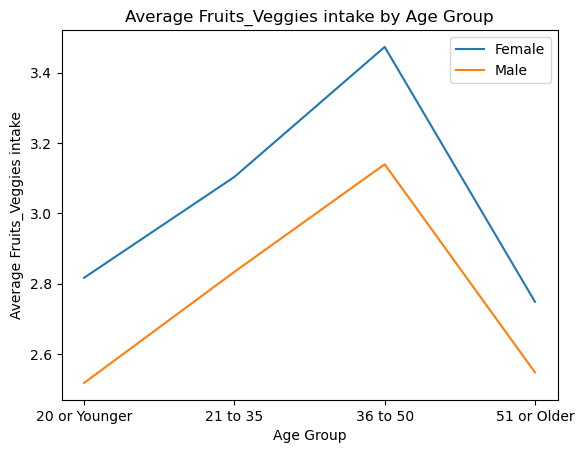

In [38]:
# Calculate the average size of the core friend circle by age group for males and females
male_core_age = networking_male_df.groupby("Age")["FRUITS_VEGGIES"].mean()
female_core_age = networking_female_df.groupby("Age")["FRUITS_VEGGIES"].mean()

# Define the x-axis labels based on 'x_axis'
age_groups = ["20 or Younger", "21 to 35", "36 to 50", "51 or Older"]

# Create line plots for male and female with labels and colors
plt.plot(age_groups, female_core_age, label="Female")
plt.plot(age_groups, male_core_age, label="Male")

# Add a title and labels
plt.title("Average Fruits_Veggies intake by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Fruits_Veggies intake")

# Add a legend to distinguish between male and female
plt.legend(loc="best")

# Save the figure
plt.savefig("data/Healthy Diets vs Work Life Balance Score(Age).png")

# Show the plot
plt.show()


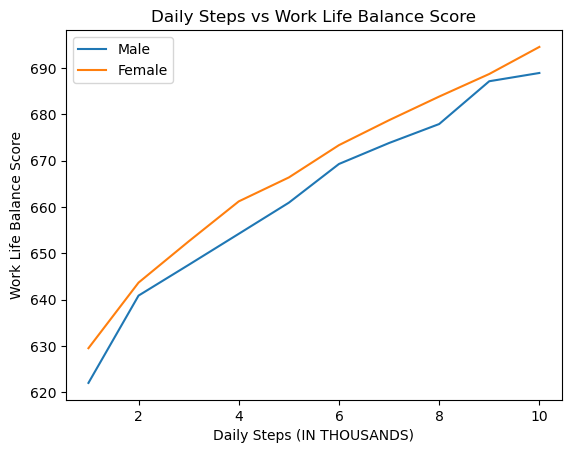

In [39]:
# Sort the weekly meditation by gender and create 2 new dataframes
male_DAILY_STEPS = networking_male_df.groupby('DAILY_STEPS')['WORK_LIFE_BALANCE_SCORE'].mean()
female_DAILY_STEPS = networking_female_df.groupby('DAILY_STEPS')['WORK_LIFE_BALANCE_SCORE'].mean()

# Plot the line curves for males and females with labels
male_DAILY_STEPS.plot(label='Male')
female_DAILY_STEPS.plot(label='Female')

# Set x and y-axis labels and the plot title
plt.xlabel('Daily Steps (IN THOUSANDS)')
plt.ylabel('Work Life Balance Score')
plt.title('Daily Steps vs Work Life Balance Score')

# Add a legend to distinguish between the data for males and females
plt.legend()

# Save the figure
plt.savefig("data/Daily Exercise vs Work Life Balance Score.png")

# Show the plot
plt.show()

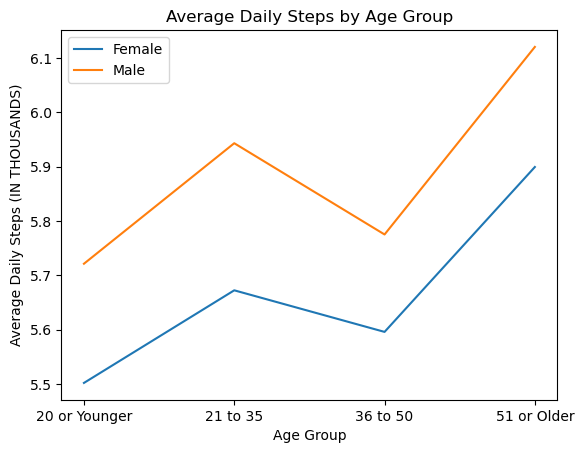

In [40]:
# Calculate the average size of the core friend circle by age group for males and females
male_core_age = networking_male_df.groupby("Age")["DAILY_STEPS"].mean()
female_core_age = networking_female_df.groupby("Age")["DAILY_STEPS"].mean()

# Define the x-axis labels based on 'x_axis'
age_groups = ["20 or Younger", "21 to 35", "36 to 50", "51 or Older"]

# Create line plots for male and female with labels and colors
plt.plot(age_groups, female_core_age, label="Female")
plt.plot(age_groups, male_core_age, label="Male")

# Add a title and labels
plt.title("Average Daily Steps by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Daily Steps (IN THOUSANDS)")

# Add a legend to distinguish between male and female
plt.legend(loc="best")

# Save the figure
plt.savefig("data/Daily Exercise vs Work Life Balance Score(Age).png")

# Show the plot
plt.show()

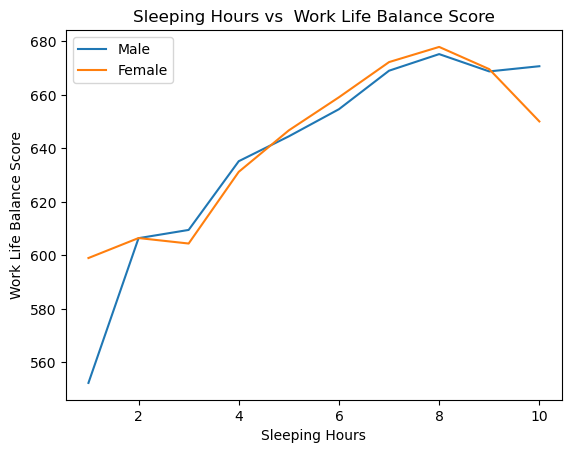

In [41]:
# Sort the weekly meditation by gender and create 2 new dataframes
male_SLEEP_HOURS = networking_male_df.groupby('SLEEP_HOURS')['WORK_LIFE_BALANCE_SCORE'].mean()
female_SLEEP_HOURS = networking_female_df.groupby('SLEEP_HOURS')['WORK_LIFE_BALANCE_SCORE'].mean()

# Plot the line curves for males and females with labels
male_SLEEP_HOURS.plot(label='Male')
female_SLEEP_HOURS.plot(label='Female')

# Set x and y-axis labels and the plot title
plt.xlabel('Sleeping Hours')
plt.ylabel('Work Life Balance Score')
plt.title('Sleeping Hours vs  Work Life Balance Score')

# Add a legend to distinguish between the data for males and females
plt.legend()

# Save the figure
plt.savefig("data/Sleeping Hours vs Work Life Balance Score.png")

# Show the plot
plt.show()

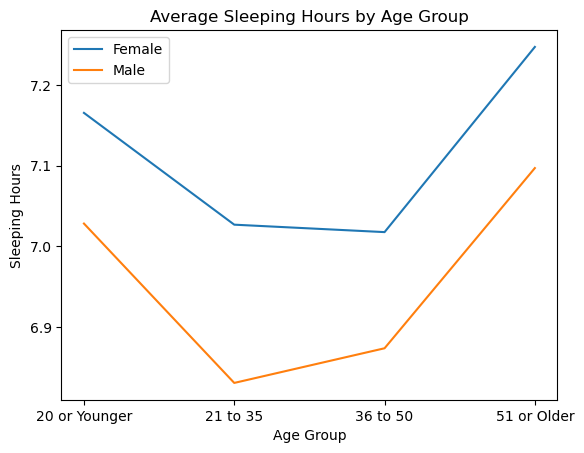

In [42]:
# Calculate the average size of the core friend circle by age group for males and females
male_core_age = networking_male_df.groupby("Age")["SLEEP_HOURS"].mean()
female_core_age = networking_female_df.groupby("Age")["SLEEP_HOURS"].mean()

# Define the x-axis labels based on 'x_axis'
age_groups = ["20 or Younger", "21 to 35", "36 to 50", "51 or Older"]

# Create line plots for male and female with labels and colors
plt.plot(age_groups, female_core_age, label="Female")
plt.plot(age_groups, male_core_age, label="Male")

# Add a title and labels
plt.title("Average Sleeping Hours by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Sleeping Hours")

# Add a legend to distinguish between male and female
plt.legend(loc="best")

# Save the figure
plt.savefig("data/Sleeping Hours vs Work Life Balance Score(Age).png")

# Show the plot
plt.show()

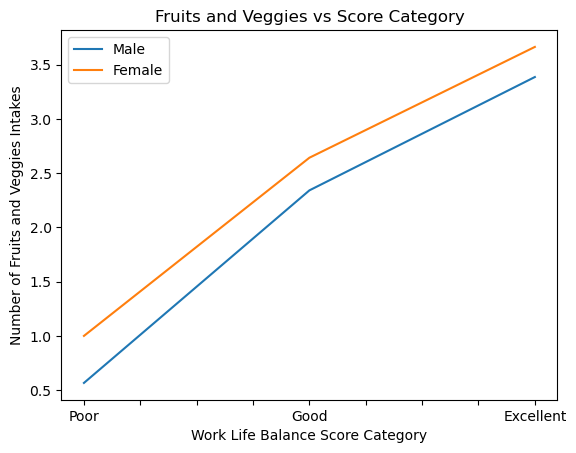

In [33]:
# Plot number of awards versus score category
male_awards_bins =networking_male_df.groupby('Work Life Summary')['FRUITS_VEGGIES'].mean()
female_awards_bins = networking_female_df.groupby('Work Life Summary')['FRUITS_VEGGIES'].mean()

# Plot the data
male_awards_bins.plot(label='Male')
female_awards_bins.plot(label='Female')

# Create x and y labels and title
plt.xlabel('Work Life Balance Score Category')
plt.ylabel('Number of Fruits and Veggies Intakes')
plt.title('Fruits and Veggies vs Score Category')
plt.legend(loc='best')

# Save the figure
plt.savefig("data/Fruits and Veggies vs Work Life Balance Score Category.png")

plt.show()

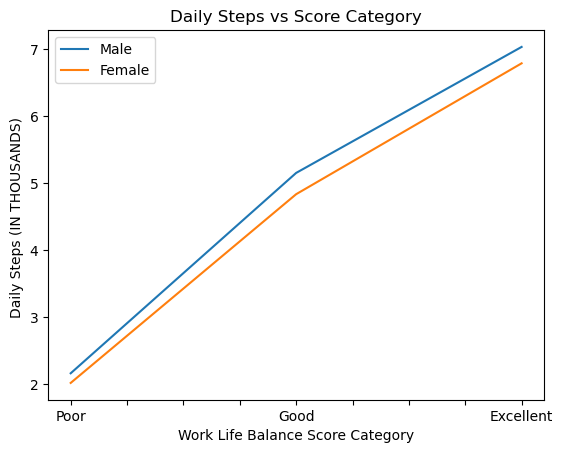

In [34]:
# Plot number of awards versus score category
male_awards_bins =networking_male_df.groupby('Work Life Summary')['DAILY_STEPS'].mean()
female_awards_bins = networking_female_df.groupby('Work Life Summary')['DAILY_STEPS'].mean()

# Plot the data
male_awards_bins.plot(label='Male')
female_awards_bins.plot(label='Female')

# Create x and y labels and title
plt.xlabel('Work Life Balance Score Category')
plt.ylabel('Daily Steps (IN THOUSANDS) ')
plt.title('Daily Steps vs Score Category')
plt.legend(loc='best')

# Save the figure
plt.savefig("data/Daily Steps vs Work Life Balance Score Category.png")

plt.show()

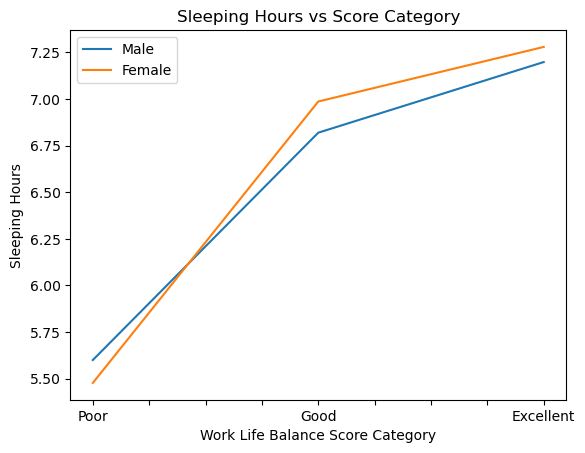

In [35]:
# Plot number of awards versus score category
male_awards_bins =networking_male_df.groupby('Work Life Summary')['SLEEP_HOURS'].mean()
female_awards_bins = networking_female_df.groupby('Work Life Summary')['SLEEP_HOURS'].mean()

# Plot the data
male_awards_bins.plot(label='Male')
female_awards_bins.plot(label='Female')

# Create x and y labels and title
plt.xlabel('Work Life Balance Score Category')
plt.ylabel('Sleeping Hours')
plt.title('Sleeping Hours vs Score Category')
plt.legend(loc='best')

# Save the figure
plt.savefig("data/Sleeping Hours vs Work Life Balance Score Category.png")

plt.show()